In [2]:
%run CPL_Library.ipynb # Running the entire library in one line because 
                        # importing does not work with JupyterLab


## Ordinary differential equations
#### 1. Euler forward / explicit
#### 2. RK-1 - Predictor Corrector / Trapezoidal method
#### 3. RK-2 - Mid-point method
#### 4. RK-4 - Runge-Kutta method - for N coupled equations
#### 5. Runge_kutta_for_shooting,   Lagrange interpolation,   Shooting method - for boundary value problems


# Question 1 (i)

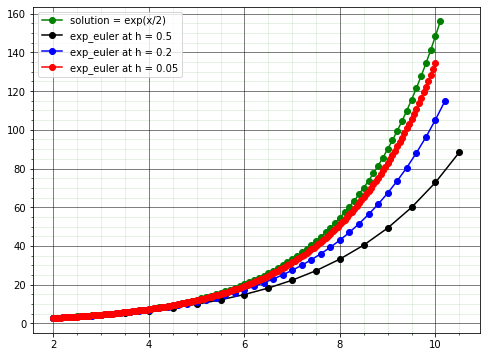

In [7]:

def sol(x,y,h,lim):
    # Constructing solution arrays
    X=[x]
    Y=[y]
    while x<=lim:
        x+=h
        y=math.exp(x/2) # Solution function
        X.append(x)
        Y.append(y)
    return X,Y


def dydx1(x,y): # derivative function
    return y*math.log(y)/x


plt.figure(figsize=(8,6))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors

h=0.1
lim=10


x=2
y=2.71828
X,Y=sol(x,y,h,lim)
plt.plot(X,Y,'g-o',label='solution = exp(x/2)')


h= [0.5, 0.2, 0.05]
x=2
y=2.71828
for i in range(len(h)):
    X,Y=exp_euler(x,y,h[i],lim,dydx1)
    plt.plot(X,Y,col[i],label='exp_euler at h = '+str(h[i]))

plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', alpha=0.2, ls='-', lw=0.5)
plt.legend()
#plt.xlim(7.88,7.92)
#plt.ylim(44.5,45.5)
plt.show()


# Question 1 (ii)

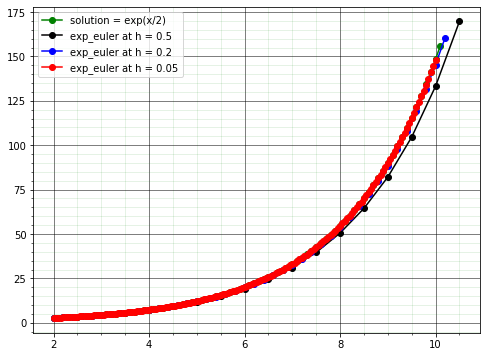

In [8]:

def sol(x,y,h,lim):
    # Constructing solution arrays
    X=[x]
    Y=[y]
    while x<=lim:
        x+=h
        y=math.exp(x/2) # Solution function
        X.append(x)
        Y.append(y)
    return X,Y


def dydx1(x,y): # derivative function
    return y*math.log(y)/x


plt.figure(figsize=(8,6))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors

h=0.1
lim=10


x=2
y=2.71828
X,Y=sol(x,y,h,lim)
plt.plot(X,Y,'g-o',label='solution = exp(x/2)')


h= [0.5, 0.2, 0.05]
x=2
y=2.71828
for i in range(len(h)):
    X,Y=predictor_corrector(x,y,h[i],lim,dydx1)
    plt.plot(X,Y,col[i],label='exp_euler at h = '+str(h[i]))

plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', alpha=0.2, ls='-', lw=0.5)
plt.legend()
#plt.xlim(7.88,7.92)
#plt.ylim(44.5,45.5)
plt.show()


# Question 2

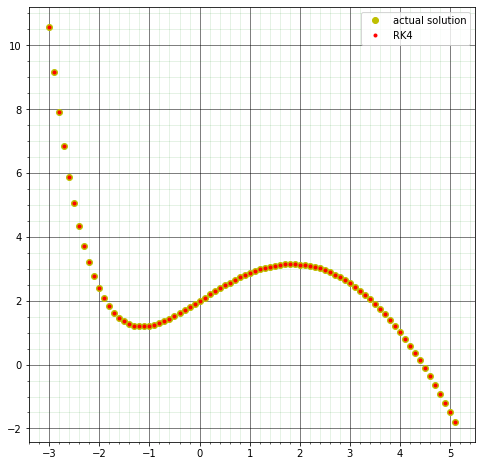

In [3]:

plt.figure(figsize=(8,8))
col=['k-o','b-o','r-o','y-o','g-o'] # Array for colors


def dydx_1(x,y,p):
    return p

def d2ydx2_1(x,y,p):
    return 1-x-p


def sol(x,y,h,l_bound,u_bound):
    x1=x
    y1=y
    X=[x]
    Y=[y]
    
    while x>=l_bound:
        x=x-h
        y=math.exp(-x)-x**2/2+2*x+1
        X.append(x)
        Y.append(y)

    while x1<=u_bound:
        x1=x1+h
        y1=math.exp(-x1)-x1**2/2+2*x1+1
        X.append(x1)
        Y.append(y1)
    
    return X,Y


x=0
y=2
h=0.1
lb=-3
ub=5

X,Y=sol(x,y,h,lb,ub)
plt.plot(X,Y,'yo',label='actual solution')


x=0
y=2
p=1
X,Y,P=RK4(x,y,p,h,lb,ub,dydx_1,d2ydx2_1)
plt.plot(X,Y,'r.',label='RK4')

plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='g', alpha=0.2, ls='-', lw=0.5)
plt.legend()
#plt.xlim(7.88,7.92)
#plt.ylim(44.5,45.5)
plt.show()


# Question 3

The unnormalised wavefunction for particles in a 1D box is shown below.
This figure shows the ground state wavefunction.


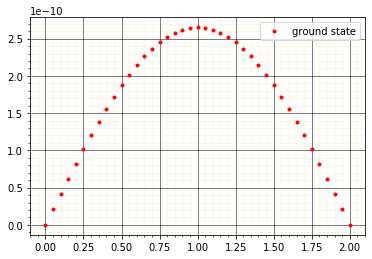



The unnormalised wavefunction for particles in a 1D box is shown below.
This figure shows the ground state first excited state


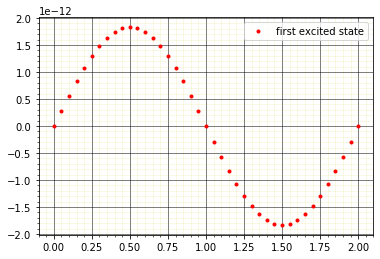

In [4]:

# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):

# second order function
def d2ydt2_1(t, y, z):
    return -(math.pi**2)*y/4

# first order function z = dy/dt
def d2ydt2_2(t, y, z):
    return -(math.pi**2)*y

# z = dy/dt
def dydt(t, y, z):
    return z

# Define boundary values
t_initial = 0
t_final = 2

y_initial = 0
y_final = 0


# Calling shooting method for ground state
print("The unnormalised wavefunction for particles in a 1D box is shown below.")
print("This figure shows the ground state wavefunction.")
t, y, z = shooting_method(d2ydt2_1, dydt, t_initial, y_initial, t_final, y_final, -2, 10, step_size=0.05)

# Plotting ground state
plt.plot(t,y,'r.',label='ground state')
plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='y', alpha=0.2, ls='-', lw=0.5)
plt.legend()
plt.show()



# Calling shooting method for first excited state
print("\n\nThe unnormalised wavefunction for particles in a 1D box is shown below.")
print("This figure shows the ground state first excited state")
t, y, z = shooting_method(d2ydt2_2, dydt, t_initial, y_initial, t_final, y_final, -2, 10, step_size=0.05)

# Plotting first excited state
plt.plot(t,y,'r.',label='first excited state')
plt.grid(b=True, which='major', color='k', alpha=1, ls='-', lw=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='y', alpha=0.2, ls='-', lw=0.5)
plt.legend()
plt.show()
